In [2]:
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
import re
import pandas as pd

In [4]:
file_path = r"C:\Users\avtha\Desktop\University\Semester 4\Master thesis\Data\finalized_data.xlsx"
data = pd.read_excel(file_path)
data.columns

Index(['Id', 'user_id', 'ship_id', 'datetime', 'score', 'feedback',
       'feedback_english', 'cleaned_feedback', 'stop_feedback'],
      dtype='object')

In [4]:
#extract services mentioned in feedback
def extract_services(feedback):
    #define common service terms
    services = ['wifi', 'connectivity', 'voucher', 'network', 'signal', 'coverage', 'speed', 'connection']
    found_services = [service for service in services if re.search(rf'\b{service}\b', feedback, re.IGNORECASE)]
    return found_services

#function to extract services from the feedback and aggregate counts
data['services'] = data['stop_feedback'].apply(extract_services)
service_counts = Counter([service for services in data['services'] for service in services])

#aggregate data by service and sentiment score
service_sentiment = data.explode('services').groupby(['services', 'score']).size().unstack(fill_value=0)



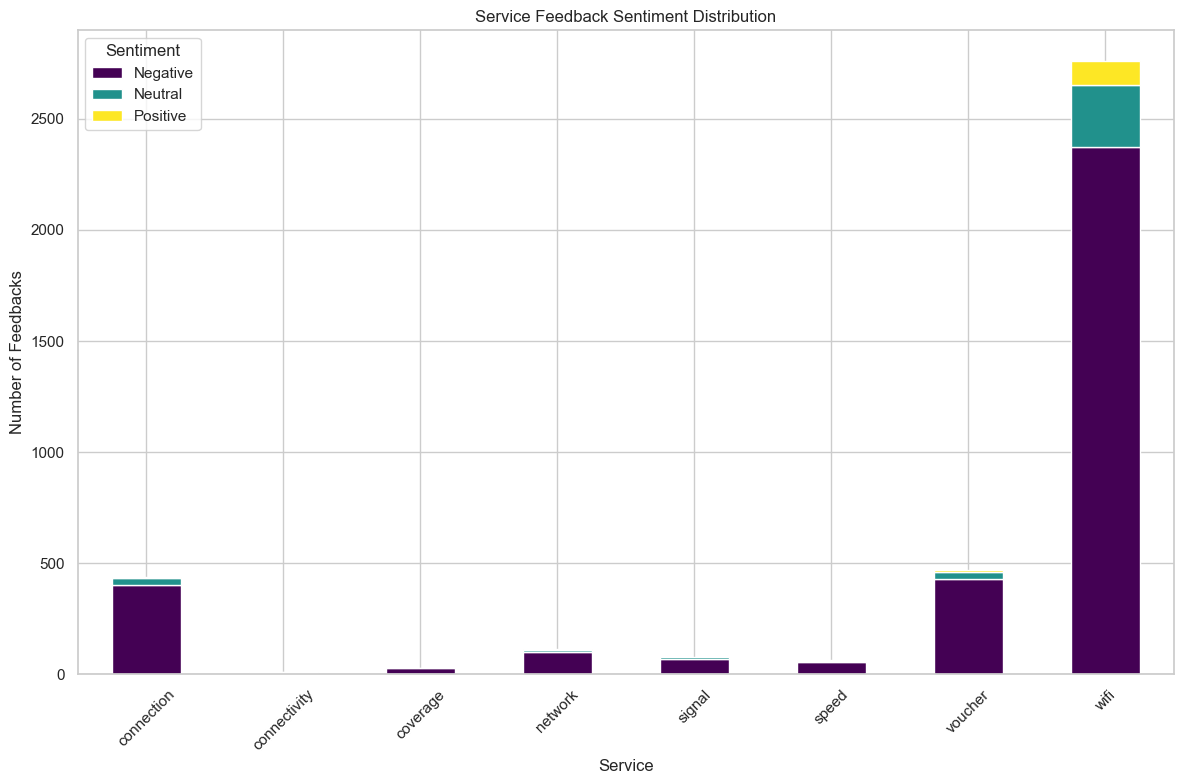

In [5]:
#print the results
sns.set_theme(style="whitegrid")
fig, ax = plt.subplots(figsize=(12, 8))
service_sentiment.plot(kind='bar', stacked=True, ax=ax, colormap='viridis')
ax.set_title('Service Feedback Sentiment Distribution')
ax.set_xlabel('Service')
ax.set_ylabel('Number of Feedbacks')
ax.legend(['Negative', 'Neutral', 'Positive'], title='Sentiment')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Timewise-distribution

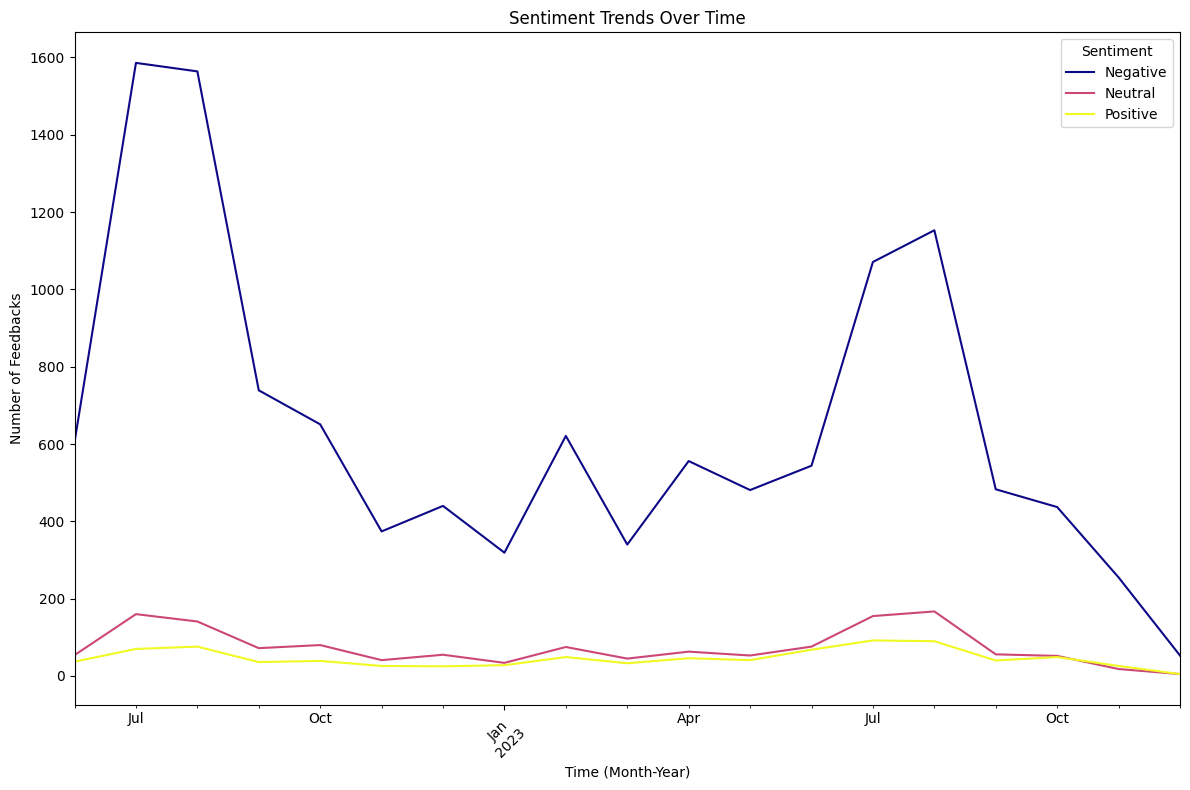

In [11]:
#extract month and year
data['datetime'] = pd.to_datetime(data['datetime'], errors='coerce')
data['year_month'] = data['datetime'].dt.to_period('M')

#group data by month and sentiment score
time_sentiment = data.groupby(['year_month', 'score']).size().unstack(fill_value=0)

#Plot the time-based sentiment analysis
fig, ax = plt.subplots(figsize=(12, 8))
time_sentiment.plot(ax=ax, colormap='plasma')
ax.set_title('Sentiment Trends Over Time')
ax.set_xlabel('Time (Month-Year)')
ax.set_ylabel('Number of Feedbacks')
ax.legend(['Negative', 'Neutral', 'Positive'], title='Sentiment')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Language-wise distribution

In [12]:
#function to identify language of feedback
def identify_language(feedback, feedback_english):
    if feedback == feedback_english:
        return 'English'
    else:
        return 'Other'

#function to assign a language to each feedback
data['language'] = data.apply(lambda x: identify_language(x['feedback'], x['feedback_english']), axis=1)

#group data by language and sentiment score
language_sentiment = data.groupby(['language', 'score']).size().unstack(fill_value=0)

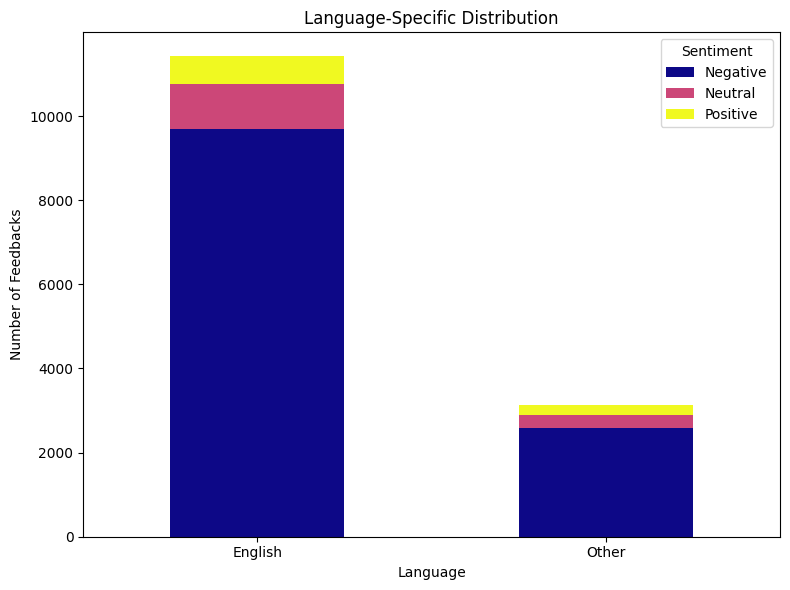

In [14]:
#Plot
fig, ax = plt.subplots(figsize=(8, 6))
language_sentiment.plot(kind='bar', stacked=True, ax=ax, colormap='plasma')
ax.set_title('Language-Specific Distribution')
ax.set_xlabel('Language')
ax.set_ylabel('Number of Feedbacks')
ax.legend(['Negative', 'Neutral', 'Positive'], title='Sentiment')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()